# 1. Prepare Data

In [36]:
# load data
import pandas as pd
df = pd.read_csv("HeteroticOrbifoldMSSMs.csv")
df = df.drop("Unnamed: 0", axis = 1)
print(df.shape)
df.head()

(124941, 14)


,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13
0,Z2xZ2,7,3,238,47,1,1,9,6,1,6,0,12,42
1,Z2xZ2,7,3,214,47,1,1,5,2,1,6,0,12,50
2,Z2xZ2,7,3,250,51,1,1,7,4,1,8,0,16,48
3,Z2xZ2,7,3,250,35,1,1,7,4,1,10,0,12,46
4,Z2xZ2,7,3,234,51,1,1,7,4,1,6,0,20,42


In [26]:
# transform Y0 to continuous variable and save it as y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.Y0)
import numpy as np
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [27]:
# save Y1, Y2, ..., Y13 as X
X = df.iloc[ : , 1: ]
print(X.shape)
X.head()

(124941, 13)


,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13
0,7,3,238,47,1,1,9,6,1,6,0,12,42
1,7,3,214,47,1,1,5,2,1,6,0,12,50
2,7,3,250,51,1,1,7,4,1,8,0,16,48
3,7,3,250,35,1,1,7,4,1,10,0,12,46
4,7,3,234,51,1,1,7,4,1,6,0,20,42


In [28]:
# split in training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# 2. Train and Adjust Hyper Parameters

In [29]:
# split trainings set in tr and val set
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [30]:
# train xgboost on tr set
from xgboost import XGBClassifier
boo = XGBClassifier(max_depth = 10, learning_rate = 0.01, n_estimators = 50, objective = 'multi:softmax',
                    reg_lambda = 0, reg_alpha = 0, subsample = 1, 
                    n_jobs = 11, random_state = 93)
boo.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=11,
              nthread=None, objective='multi:softprob', random_state=93,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
# test boo on val set
# compute confusion matrix and accuracy
pred = boo.predict(X_val)
np.set_printoptions(linewidth=200)            # for nicer print
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred, y_val))
print(sum(y_val == pred)/len(y_val))

[[  65    0    1    6    0    0    1    0    2    0    5    0    1    0]
 [   0   14    2    2    2    0    0    1    0    0    0    0    0    1]
 [   0    0   75   15    0    0    0    0    3    0    1    0    0    1]
 [  82   37  173 7809   75   27  163    7 1351    4  167   10   76  151]
 [   0    0    0    3   18    0    0    0    1    0    2    0    0    0]
 [   0    0    0    7    0  456   10    0   13    0    1    1    0    0]
 [   1    0    0   31    1    6  318    0  121    0    2    1    0    1]
 [   0    0    0    0    0    0    0   13    0    0    0    0    1    0]
 [   7    0    4  843   57   38  319    2 6275    0    5  535    3   18]
 [   0    0    0    0    0    0    0    0    1    1    0    0    0    0]
 [   5    1    0    6    0    0    1    0    5    0   53    0    1    3]
 [   0    0    0    6    0    1    2    0   18    0    0   68    0    0]
 [   2    0    0    7    0    0    1    1    5    0    3    0   59    1]
 [   1    9    0   10    0    0    1    0   16    0

In [8]:
# best parameters:
# n_estimators = 1000
# max_depth = 10
# learning rate = 0.1
print(sum(y_val == pred)/len(y_val))

0.9035566004702116


In [32]:
# print first few predictions and true values
print(pred[0:10])
print(y_val[0:10])
print((pred == y_val)[0:10])

[8 3 8 3 3 8 8 8 8 3]
[ 8  3  8  8  8  8  8 11  8  3]
[ True  True  True False False  True  True False  True  True]


Prediction gets better if we use more trees, which means increase n_estimators. But than it is more timeconsuming

# 3. Train on Full Training Set and Test on Test Set

In [33]:
# train xgboost on tr set
from xgboost import XGBClassifier
boo = XGBClassifier(max_depth = 10, learning_rate = 0.01, n_estimators = 50, objective = 'multi:softmax',
                    reg_lambda = 0, reg_alpha = 0, subsample = 1, 
                    n_jobs = 11, random_state = 93)
boo.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=11,
              nthread=None, objective='multi:softprob', random_state=93,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
# test boo on test set
# compute confusion matrix and accuracy
pred = boo.predict(X_test)

print(confusion_matrix(y_test, pred))
print('Accuracy of our Model:', sum(y_test == pred)/len(y_test))

[[  81    1    0  106    0    0    1    0   12    0    9    0    6    3]
 [   0   25    0   49    1    0    0    0    0    0    2    0    0    5]
 [   0    0  123  202    0    0    0    0    9    0    1    0    0    0]
 [  10    0   11 9877    3   13   33    0 1057    0    6   10   14   10]
 [   0    0    1  128   17    0    2    0   57    0    3    1    0    1]
 [   0    0    0   37    0  563    3    1   43    0    1    1    0    1]
 [   0    0    0  199    2   11  398    0  412    0    1    2    0    2]
 [   0    0    0   15    0    0    1   20    1    0    0    0    6    0]
 [   3    0    2 1670    2    7  123    0 7887    0    2   24    7    9]
 [   0    0    0    4    0    0    1    0    0    6    0    0    0    1]
 [   5    0    1  157    2    1    1    0   11    0   68    0    6    7]
 [   0    0    0   23    0    0    1    0  585    0    0   90    0    0]
 [   0    1    0  101    0    0    0    0    5    0    2    0   83    1]
 [   2    4    1  181    4    0    1    0   12    0

## Feature Importance for Boosting

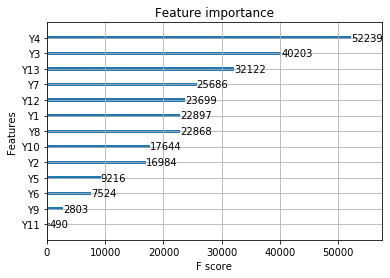

In [35]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(boo)
plt.show()